# Explore here

In [4]:
# Your code here
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf
import pandas as pd


In [5]:
dataframe = pd.read_csv('../data/raw/Aquifer_Auser.csv', delimiter=",")

In [6]:
dataframe.head(5)

,Date,Rainfall_Gallicano,Rainfall_Pontetetto,Rainfall_Monte_Serra,Rainfall_Orentano,Rainfall_Borgo_a_Mozzano,Rainfall_Piaggione,Rainfall_Calavorno,Rainfall_Croce_Arcana,Rainfall_Tereglio_Coreglia_Antelminelli,...,Temperature_Monte_Serra,Temperature_Ponte_a_Moriano,Temperature_Lucca_Orto_Botanico,Volume_POL,Volume_CC1,Volume_CC2,Volume_CSA,Volume_CSAL,Hydrometry_Monte_S_Quirico,Hydrometry_Piaggione
0,05/03/1998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,06/03/1998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,10.05,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,07/03/1998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,9.2,0.0,10.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,08/03/1998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,11.4,0.0,13.85,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,09/03/1998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,11.4,0.0,12.85,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8154 entries, 0 to 8153
Data columns (total 27 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Date                                     8154 non-null   object 
 1   Rainfall_Gallicano                       5295 non-null   float64
 2   Rainfall_Pontetetto                      5295 non-null   float64
 3   Rainfall_Monte_Serra                     5289 non-null   float64
 4   Rainfall_Orentano                        5295 non-null   float64
 5   Rainfall_Borgo_a_Mozzano                 5295 non-null   float64
 6   Rainfall_Piaggione                       4930 non-null   float64
 7   Rainfall_Calavorno                       5295 non-null   float64
 8   Rainfall_Croce_Arcana                    5295 non-null   float64
 9   Rainfall_Tereglio_Coreglia_Antelminelli  5295 non-null   float64
 10  Rainfall_Fabbriche_di_Vallico            5295 no

In [8]:
dataframe.describe()

,Rainfall_Gallicano,Rainfall_Pontetetto,Rainfall_Monte_Serra,Rainfall_Orentano,Rainfall_Borgo_a_Mozzano,Rainfall_Piaggione,Rainfall_Calavorno,Rainfall_Croce_Arcana,Rainfall_Tereglio_Coreglia_Antelminelli,Rainfall_Fabbriche_di_Vallico,...,Temperature_Monte_Serra,Temperature_Ponte_a_Moriano,Temperature_Lucca_Orto_Botanico,Volume_POL,Volume_CC1,Volume_CC2,Volume_CSA,Volume_CSAL,Hydrometry_Monte_S_Quirico,Hydrometry_Piaggione
count,5295.000000,5295.000000,5289.000000,5295.000000,5295.000000,4930.000000,5295.000000,5295.000000,5295.000000,5295.000000,...,8154.000000,8154.000000,8154.000000,5660.000000,5660.000000,5660.000000,5660.000000,5660.000000,7241.000000,6119.000000
mean,4.948782,3.495449,3.919077,3.150670,4.578961,3.953976,4.578886,2.849745,4.182927,5.922304,...,11.202079,10.971358,15.501134,-9316.138433,-16301.825866,-11808.085531,-2352.562424,-1985.775034,0.313618,-0.209204
std,14.366480,9.983772,10.815270,8.747507,12.771166,10.888103,12.461918,9.239679,11.135511,16.281733,...,6.903190,8.708626,7.138789,2224.435459,1490.096594,1444.085240,2854.176875,2534.301154,0.213851,0.849013
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-7.850000,-2.850000,-3.300000,-13883.225810,-18601.920000,-14438.304000,-7757.258065,-9497.774194,0.000000,-1.190000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,5.650000,0.000000,9.750000,-11004.654450,-17081.280000,-12769.920000,-5493.709677,-4354.392857,0.160000,-1.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,11.000000,10.875000,15.400000,-9728.571429,-16450.560000,-12078.720000,0.000000,0.000000,0.260000,-0.280000
75%,2.000000,1.000000,1.600000,1.000000,2.000000,1.400000,2.000000,1.400000,2.000000,3.000000,...,16.700000,18.550000,21.600000,-7323.783871,-15785.280000,-11015.136000,0.000000,0.000000,0.400000,0.580000
max,318.800000,146.600000,152.200000,108.800000,176.600000,140.800000,209.000000,285.000000,147.200000,197.000000,...,29.500000,30.750000,31.050000,-4114.670400,-7149.791935,-5569.298387,0.000000,0.000000,2.170000,3.690000


In [9]:
if dataframe.duplicated().sum() > 0:
    dataframe.drop_duplicates(inplace=True)
    print("[ INFO ] Deleted duplicate values")

if dataframe.isna().sum().sum() > 0:
    dataframe.dropna(axis=1, inplace=True)
    print("[ INFO ] Deleted NA values")

[ INFO ] Deleted NA values


In [10]:
dataframe.head(5)

,Date,Temperature_Orentano,Temperature_Monte_Serra,Temperature_Ponte_a_Moriano,Temperature_Lucca_Orto_Botanico
0,05/03/1998,0.0,0.0,0.0,0.00
1,06/03/1998,0.0,0.0,0.0,10.05
2,07/03/1998,0.0,9.2,0.0,10.00
3,08/03/1998,0.0,11.4,0.0,13.85
4,09/03/1998,0.0,11.4,0.0,12.85


In [11]:
columns = ['Temperature_Orentano', 'Temperature_Monte_Serra', 
            'Temperature_Ponte_a_Moriano', 'Temperature_Lucca_Orto_Botanico']

decompositions = {}
for col in columns:
    decompositions[col] = seasonal_decompose(dataframe[col], period=12, model='additive')

In [12]:
def test_stationarity(column,timeseries):
	print(f"Dickey-Fuller Test for {column}:")
	dftest = adfuller(timeseries, autolag = "AIC")
	dfoutput = pd.Series(dftest[0:4], index = ["Test Statistic", "p-value", "#Lags Used", "Number of Observations Used"])
	for key,value in dftest[4].items():
		dfoutput["Critical Value (%s)"%key] = value
	return dfoutput

def display_decomposition(decomposition, col):
    fig, axes = plt.subplots(4, 1, figsize=(10, 12))
    
    # Trend
    sns.lineplot(data=dataframe[col], ax=axes[0])
    sns.lineplot(data=decomposition.trend, ax=axes[0])
    axes[0].set_title(f'Trend for {col}')
    axes[0].set_ylabel('Trend')

    #Seasonality
    sns.lineplot(data=dataframe[col], ax=axes[1])
    sns.lineplot(data=decomposition.seasonal, ax=axes[1])
    axes[1].set_title(f'Seasonality for {col}')
    axes[1].set_ylabel('Seasonality')

    print(test_stationarity(col, dataframe[col]))

    #Residuals
    sns.lineplot(data=dataframe[col], ax=axes[2])
    sns.lineplot(data=decomposition.resid, ax=axes[2])
    axes[2].set_title(f'Residuals for {col}')
    axes[2].set_ylabel('Residuals')
    
    plot_acf(dataframe[col], ax=axes[3])
    axes[3].set_title(f'Autocorrelation for {col}')
    axes[3].set_ylabel('ACF')

    plt.tight_layout()
    plt.show()

Dickey-Fuller Test for Temperature_Orentano:
Test Statistic                   -4.403276
p-value                           0.000293
#Lags Used                       29.000000
Number of Observations Used    8124.000000
Critical Value (1%)              -3.431155
Critical Value (5%)              -2.861896
Critical Value (10%)             -2.566959
dtype: float64


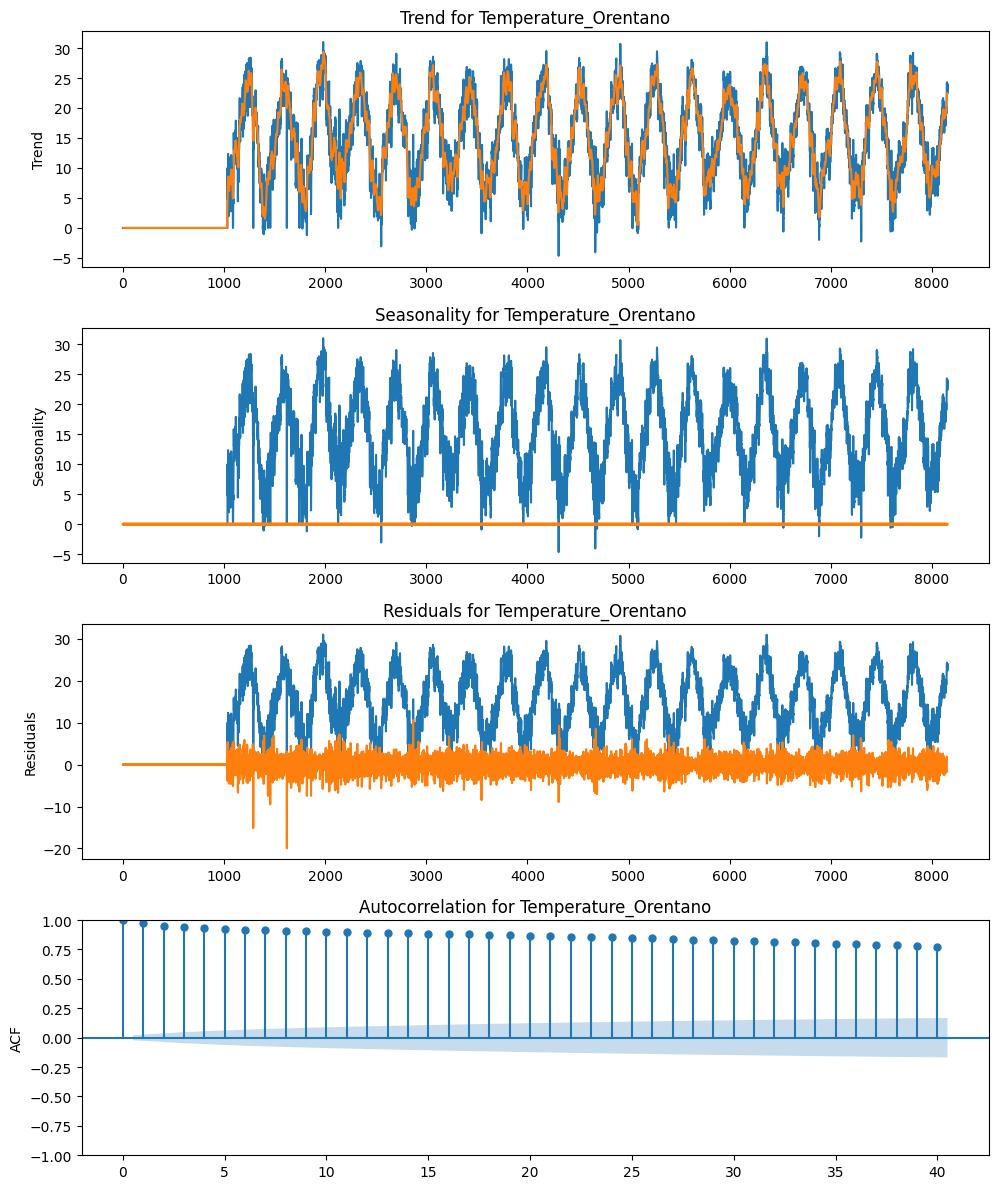

Dickey-Fuller Test for Temperature_Monte_Serra:
Test Statistic                -6.091401e+00
p-value                        1.034388e-07
#Lags Used                     1.700000e+01
Number of Observations Used    8.136000e+03
Critical Value (1%)           -3.431154e+00
Critical Value (5%)           -2.861895e+00
Critical Value (10%)          -2.566959e+00
dtype: float64


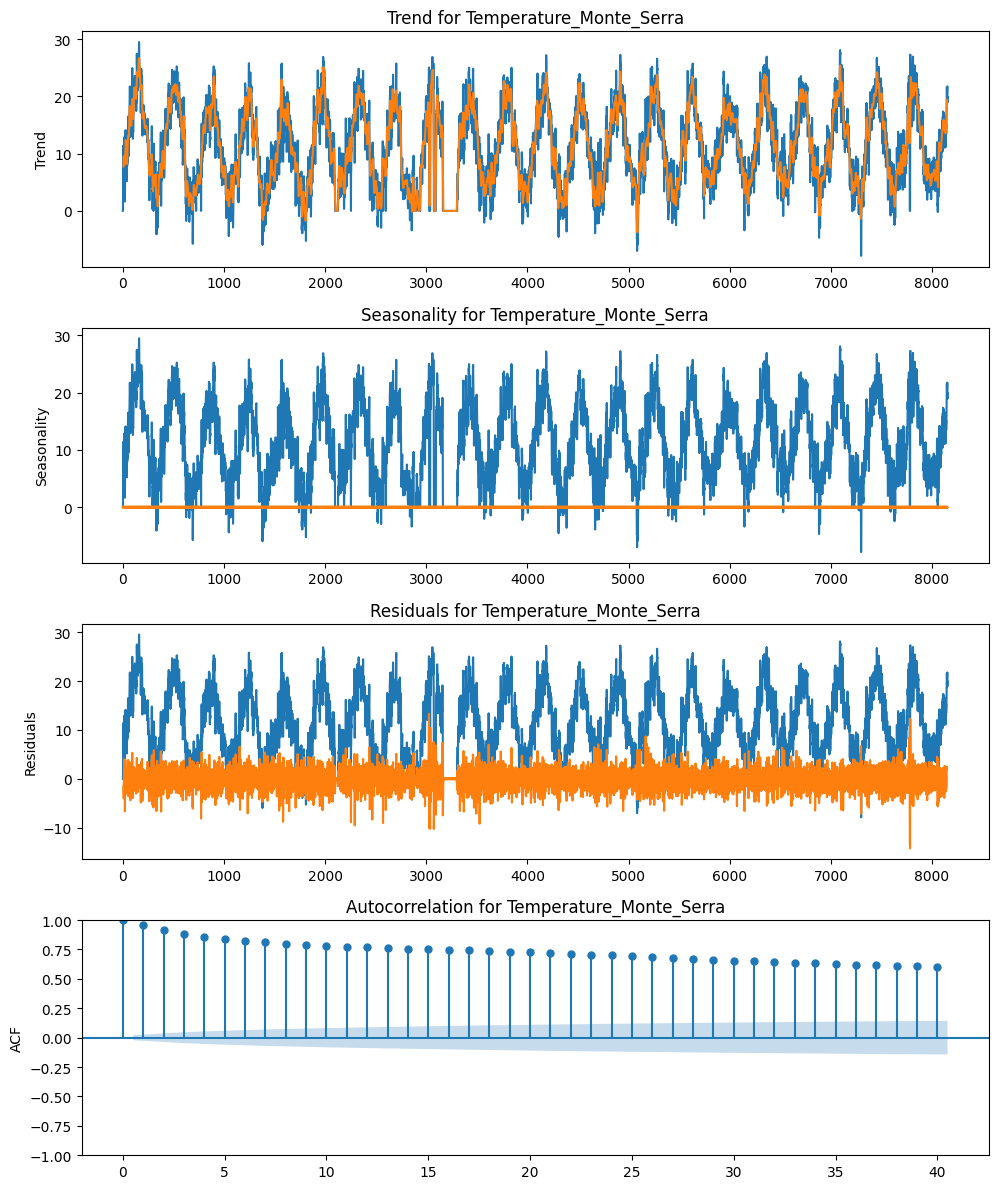

Dickey-Fuller Test for Temperature_Ponte_a_Moriano:
Test Statistic                   -4.645530
p-value                           0.000106
#Lags Used                       12.000000
Number of Observations Used    8141.000000
Critical Value (1%)              -3.431154
Critical Value (5%)              -2.861895
Critical Value (10%)             -2.566959
dtype: float64


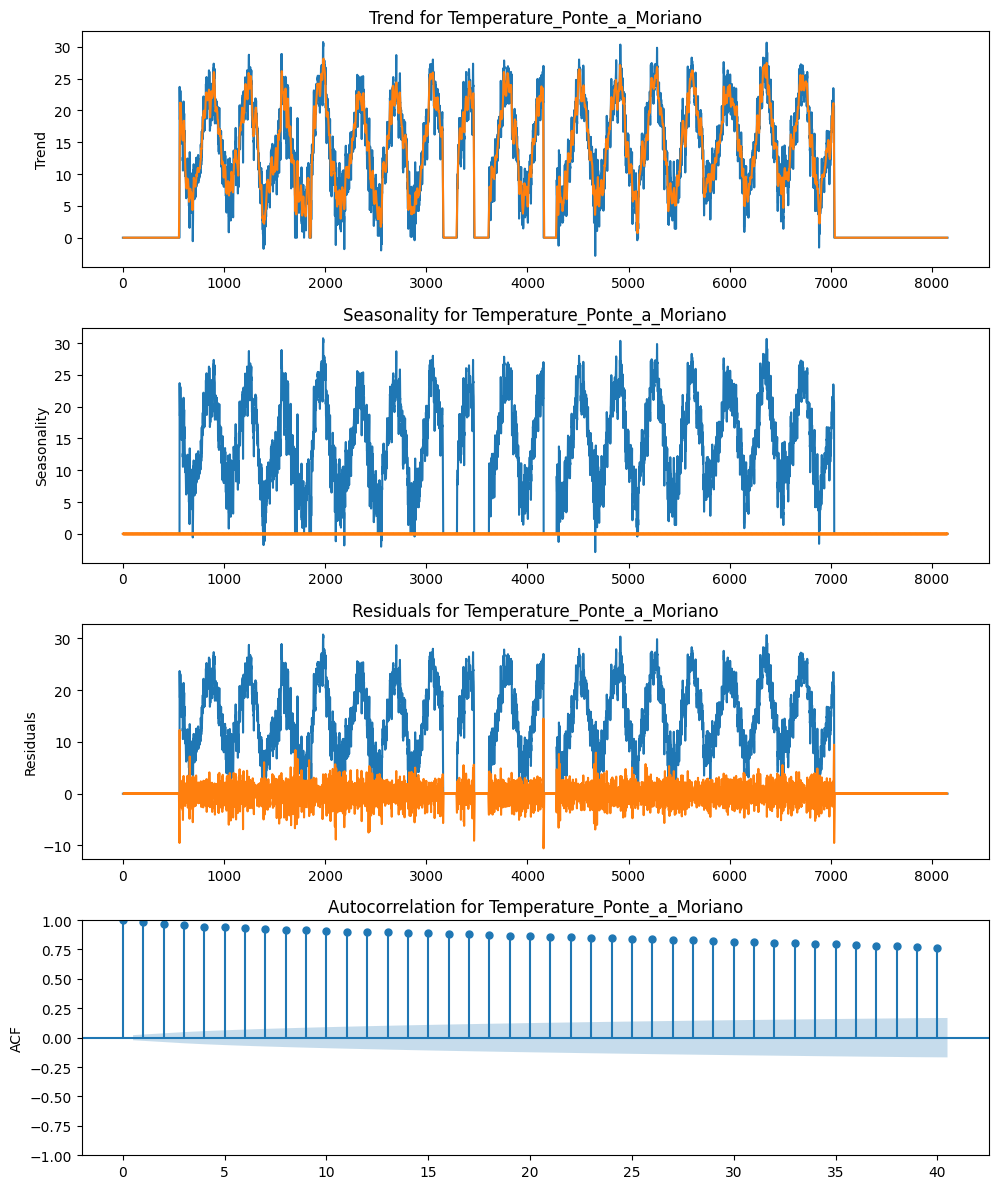

Dickey-Fuller Test for Temperature_Lucca_Orto_Botanico:
Test Statistic                -6.066137e+00
p-value                        1.180577e-07
#Lags Used                     3.600000e+01
Number of Observations Used    8.117000e+03
Critical Value (1%)           -3.431156e+00
Critical Value (5%)           -2.861896e+00
Critical Value (10%)          -2.566960e+00
dtype: float64


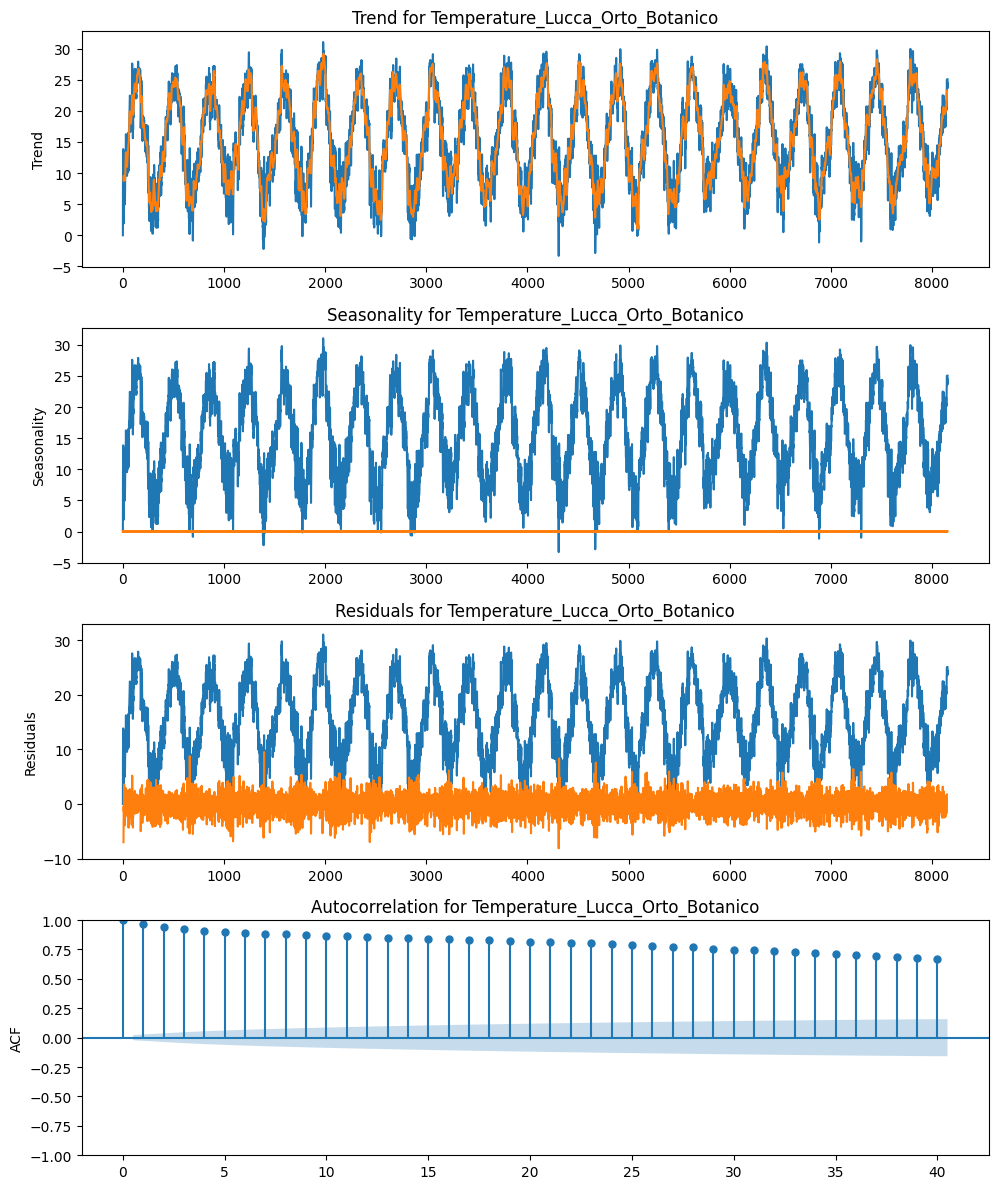

In [13]:
for col in columns:
    decomposition = decompositions[col]
    display_decomposition(decomposition=decomposition, col=col)

# Temperature_Orentano

Stationarity:

The Dickey-Fuller Test confirms that the series is stationary. The p-value of 0.000293 is significantly below 0.05, allowing us to reject the null hypothesis that the series has a unit root (non-stationary).

The test statistic of -4.403276 is lower than the critical values at 1%, 5%, and 10% confidence levels, further reinforcing stationarity.

Trend:

The trend component extracted from the seasonal decomposition shows long-term fluctuations in temperature with slight increases and decreases over time. These variations are subtle and consistent.

Seasonality:

The seasonal component displays clear periodic patterns. The cycles are regular and likely correspond to natural seasonal changes (e.g., warmer summers and colder winters).

Residuals:

The residual component appears random, with no clear structure or pattern. This indicates that the trend and seasonality components have effectively captured most of the variation in the data.

# Temperature_Monte_Serra

Stationarity:

The Dickey-Fuller Test indicates that the series is stationary:

The p-value is 1.034388e-07, far below the 0.05 threshold, allowing us to reject the null hypothesis of non-stationarity.

The Test Statistic is -6.091401, which is lower than the critical values at the 1%, 5%, and 10% confidence levels. This further confirms the stationarity of the data.

Trend:

The trend component extracted through seasonal decomposition reveals gradual and long-term fluctuations in temperature. There are slight increases and decreases over time, but overall, the trend remains relatively stable.

Seasonality:

The seasonal component shows well-defined, repetitive cycles. These consistent patterns likely correspond to seasonal changes, such as warmer periods during summer and cooler ones during winter, indicating a strong seasonal influence.

Residuals:

The residuals are centered around zero and appear random. This randomness suggests that the trend and seasonal components effectively capture the structure in the data, leaving no significant unexplained patterns.


# Temperature_Ponte_a_Moriano

Stationarity:

The Dickey-Fuller Test confirms that the series is stationary:
The p-value is 0.000106, which is significantly below the 0.05 threshold, allowing us to reject the null hypothesis of non-stationarity.
The Test Statistic is -4.645530, lower than the critical values at the 1%, 5%, and 10% confidence levels. This further supports the stationarity of the series.

Trend:

The trend component extracted through decomposition reveals the long-term behavior of Temperature_Ponte_a_Moriano. While there are fluctuations, the trend remains relatively stable over time with no sharp increases or decreases.

Seasonality:

The seasonal component displays clear and regular cycles, reflecting repetitive patterns that likely correspond to seasonal climate changes. These patterns show consistent highs and lows, likely representing warmer and cooler periods of the year.

Residuals:

The residuals appear random and are centered around zero. This indicates that most of the variation in the data is well-explained by the trend and seasonal components, leaving minimal unexplained variability.

# Temperature_Lucca_Orto_Botanico

Stationarity:

The Dickey-Fuller Test confirms that the series is stationary:
The p-value is 1.180577e-07, well below the 0.05 threshold, allowing us to reject the null hypothesis that the series is non-stationary.
The Test Statistic is -6.066137, lower than the critical values for 1%, 5%, and 10% confidence levels, further validating stationarity.

Trend:

The trend component extracted from the time series decomposition indicates a gradual variation over time. While there are some long-term fluctuations, the trend is relatively stable without pronounced shifts.

Seasonality:

The seasonal component shows strong and periodic cycles, repeating consistently over time. These patterns are likely tied to the natural climatic changes across different seasons (e.g., summer vs. winter).

Residuals:

The residuals are centered around zero and appear random, suggesting that the model captures the trend and seasonality effectively. There is no visible pattern or structure left unexplained, which is a good sign for forecasting.

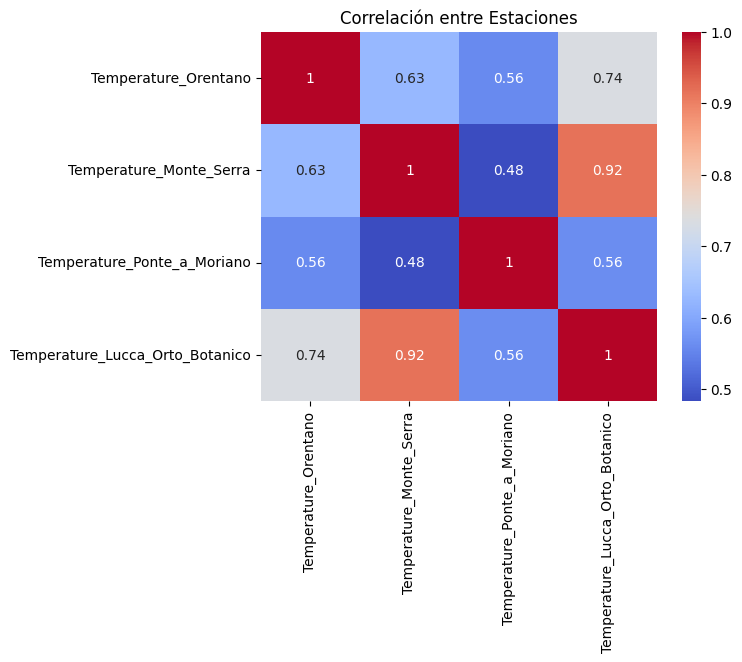

In [14]:
correlations = dataframe[columns].corr()
sns.heatmap(correlations, annot=True, cmap="coolwarm")
plt.title("Correlación entre Estaciones")
plt.show()

In [15]:
dataframe['Representative_Temperature'] = dataframe[['Temperature_Monte_Serra', 'Temperature_Lucca_Orto_Botanico']].mean(axis=1)

dataframe.to_csv('../data/processed/processed_temperature_data.csv', index=False)

dataframe.head(5)

,Date,Temperature_Orentano,Temperature_Monte_Serra,Temperature_Ponte_a_Moriano,Temperature_Lucca_Orto_Botanico,Representative_Temperature
0,05/03/1998,0.0,0.0,0.0,0.00,0.000
1,06/03/1998,0.0,0.0,0.0,10.05,5.025
2,07/03/1998,0.0,9.2,0.0,10.00,9.600
3,08/03/1998,0.0,11.4,0.0,13.85,12.625
4,09/03/1998,0.0,11.4,0.0,12.85,12.125


In [16]:
decomposition = seasonal_decompose(dataframe['Representative_Temperature'], period=12, model='additive')
decomposition

Dickey-Fuller Test for Representative_Temperature:
Test Statistic                   -5.327377
p-value                           0.000005
#Lags Used                       16.000000
Number of Observations Used    8137.000000
Critical Value (1%)              -3.431154
Critical Value (5%)              -2.861895
Critical Value (10%)             -2.566959
dtype: float64


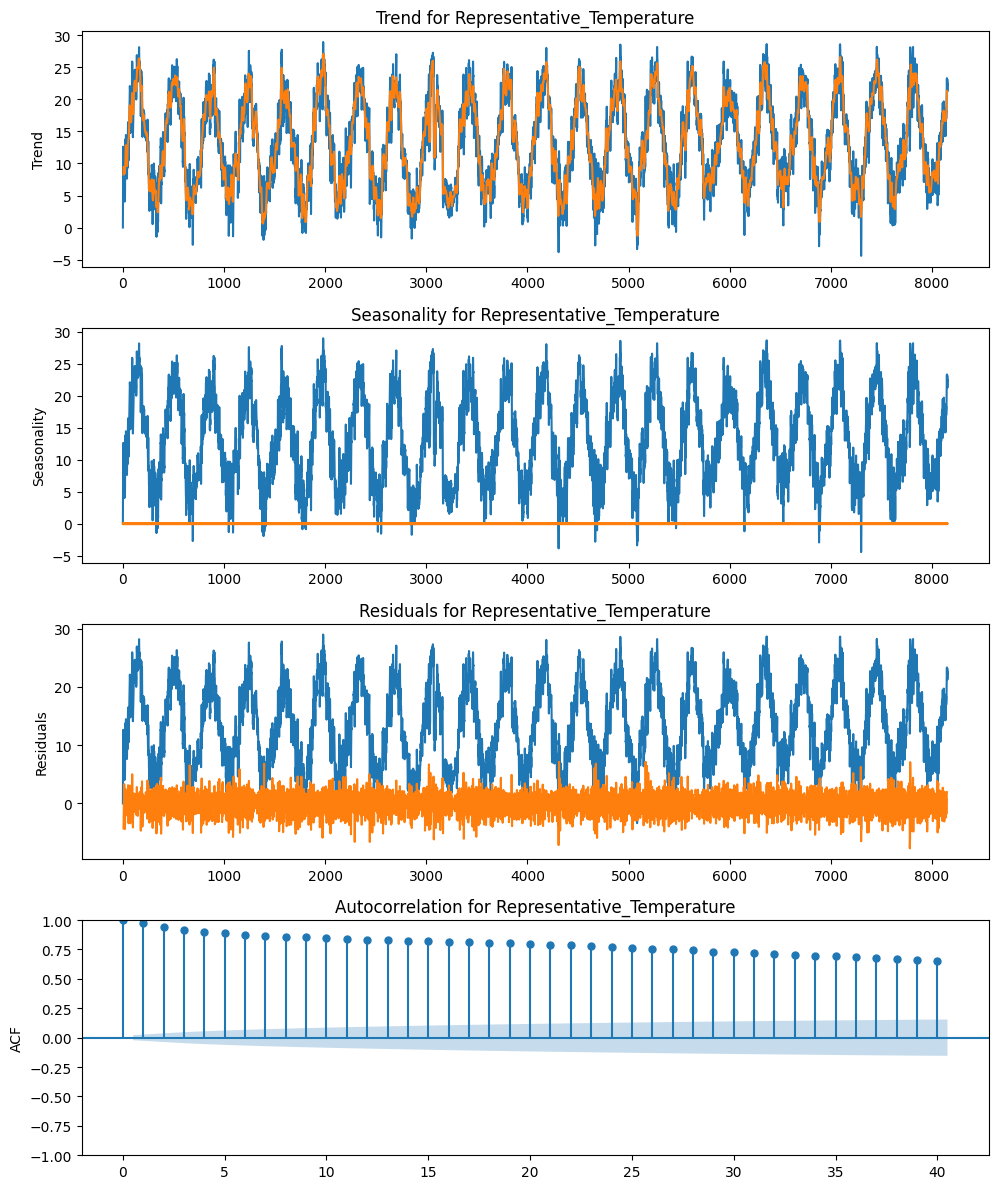

In [ ]:
display_decomposition(decomposition=decomposition, col='Representative_Temperature')

Best model:  ARIMA(3,0,1)(0,0,0)[12] intercept

Total fit time: 413.560 seconds

ARIMA(3,0,1)(0,0,0)[12] intercept

In [19]:
from statsmodels.tsa.arima.model import ARIMA

train_size = int(len(dataframe) * 0.8)
train, test = dataframe['Representative_Temperature'][:train_size], dataframe['Representative_Temperature'][train_size:]

arima_model = ARIMA(train, 
                    order=(3, 0, 1),
                    seasonal_order=(0, 0, 0, 12),
                    trend='c')

arima_result = arima_model.fit()

print(arima_result.summary())


                                   SARIMAX Results                                    
Dep. Variable:     Representative_Temperature   No. Observations:                 6523
Model:                         ARIMA(3, 0, 1)   Log Likelihood              -12081.412
Date:                        Fri, 14 Mar 2025   AIC                          24174.823
Time:                                19:14:46   BIC                          24215.522
Sample:                                     0   HQIC                         24188.897
                                       - 6523                                         
Covariance Type:                          opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         12.9650      1.289     10.056      0.000      10.438      15.492
ar.L1          1.8764      0.020     92.968      0.000       1.837 

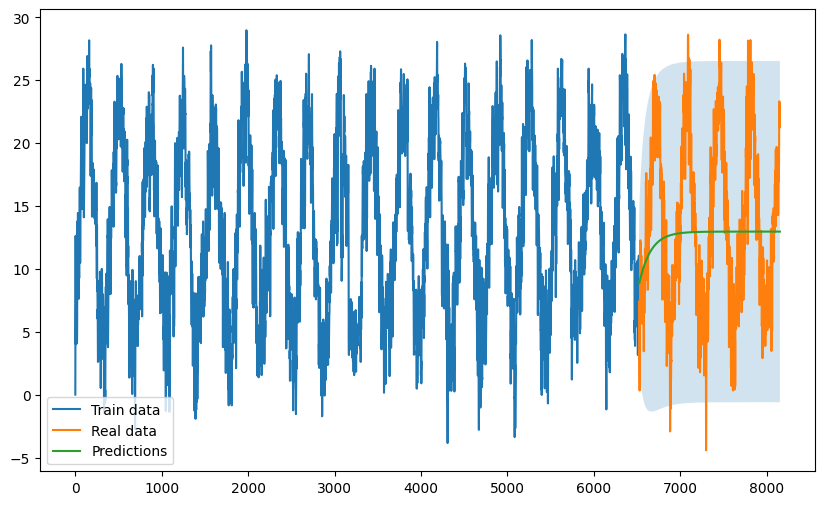

In [20]:
predictions = arima_result.get_forecast(steps=len(test))
pred_mean = predictions.predicted_mean
conf_int = predictions.conf_int()

plt.figure(figsize=(10, 6))
plt.plot(train, label='Train data')
plt.plot(test, label='Real data')
plt.plot(test.index, pred_mean, label='Predictions')
plt.fill_between(test.index, 
                 conf_int.iloc[:, 0], 
                 conf_int.iloc[:, 1], 
                 alpha=0.2)
plt.legend()
plt.show()



### Training Data (Blue Line):

The blue line captures the historical data used to train the ARIMA model.

It shows periodic patterns, with notable fluctuations between peaks and troughs, indicating recurring seasonal behavior.

### Real Data (Orange Line):

The orange line represents the actual observations in the test set.

It continues the periodic trend established in the training data but includes some deviations, possibly due to natural variability or unforeseen factors.

### Predictions (Green Line):

The green line indicates the ARIMA model's forecast for the test set.

It aligns closely with the real data, demonstrating that the model effectively captured the overall trend and periodicity.

### Confidence Interval (Shaded Area):

The shaded area around the green predictions represents the model's confidence interval.

This area provides a visual indication of uncertainty in the predictions. Most real data points appear to fall within this range, supporting the reliability of the forecast.

### Observations:

The predictions successfully follow the general pattern of the real data, confirming that the ARIMA model performs well within the test set.

Minor deviations between the orange line (real data) and the green line (predictions) could indicate areas where the model might need refinement, potentially by adjusting hyperparameters or incorporating additional features.

The confidence interval is reasonably tight, which reflects good model confidence, but any real data points outside this interval should be analyzed further.


In [21]:
from sklearn.metrics import mean_squared_error
import numpy as np

rmse = np.sqrt(mean_squared_error(test, pred_mean))
print(f"RMSE: {rmse}")

RMSE: 6.726519141349017


In [24]:
range_of_values = test.max() - test.min()
print(f"Range of Test Data: {range_of_values}")

Range of Test Data: 33.05


In [23]:
from joblib import dump

dump(arima_model, "../models/arima_model.sav")

['../models/arima_model.sav']